
# Examples

In [ ]:
# setup
import math
import random
import matplotlib.pyplot as plt

# render plots in the notebook, instead of in external windows,
# which tend to be annoying
%matplotlib inline


In [ ]:
def swapone(s, n):
    c = s[n]
    # get the char, swap it
    c = c.swapcase()
    # and put back in the string
    s[n] = c
    return s

swapone('abcd', 2)

In [ ]:
# take 2

def swapone2(s, n):
    # take the string apart
    left = s[:n]
    right = s[n+1:]
    swap = s[n].swapcase()
    # and put it back together
    return left + swap + right
    
swapone2('abcd', 2)

In [ ]:
list('asdf')

In [ ]:
# take 3

def swapone3(s, n):
    # convert to a list!!
    sl = list(s)
    # list can be updated
    sl[n] = sl[n].swapcase()
    # convert back to string
    return ''.join(sl)

swapone3('abcd', 2)

# Structure sharing

In [128]:
# lists are zero origin

x = [[1,2],[3,4],[5,6]]
x

[[1, 2], [3, 4], [5, 6]]

In [129]:
# 2nd element of outer list, then 1st element of [3,4]

x[1][0]

3

In [130]:
x[1][0] = 55
x

[[1, 2], [55, 4], [5, 6]]

In [190]:
y = 5*[[1,2]]
y

[[1, 2], [1, 2], [1, 2], [1, 2], [1, 2]]

In [191]:
# why so many 55's? 
# because 5*[[1,2]] made a len 5 list, then
# filled it with references to the same [1,2] list. 
# only one [1,2] was constructed, not 5

y[1][0] = 55
y

[[55, 2], [55, 2], [55, 2], [55, 2], [55, 2]]

In [188]:
# this will make 5 separate [1,2] lists

z = [[1,2] for j in range(5)]
z

[[1, 2], [1, 2], [1, 2], [1, 2], [1, 2]]

In [189]:
# the other four [1,5] lists are not affected 

z[1][0] = 55
z

[[1, 2], [55, 2], [1, 2], [1, 2], [1, 2]]

In [193]:
# in class i made a typo and did this:
# why did 55 replace the 2nd [1,2] list?
# work from the inside out:
# [1][0] => 1 , so next step
# z[1] = 55

z = [[1,2] for j in range(5)]
z[[1][0]] = 55
z

[[1, 2], 55, [1, 2], [1, 2], [1, 2]]

# Histogram of Guassian samples

In [138]:
# mean = 0, stddev = 1

[random.gauss(0,1) for j in range(10)]

[-0.3081784246773917,
 -1.5252767706109702,
 -0.1425773937373015,
 0.5192990369574142,
 -0.028075937727309853,
 -0.4735140337951511,
 -0.1611815724607735,
 0.7976321303564514,
 -3.002808602826012,
 0.10303594546738483]

In [139]:
# get 100,100 samples, and filter out data greater than 2 SD

gd = [d for d in [random.gauss(0,1) for j in range(100000)] if abs(d)<2]


In [196]:
# int seems like an easy way to compute bin numbers

[int(3.4), int(-3.2)]

[3, -3]

In [153]:
# list of bins each data point fell into
# using 'int' instead of 'math.floor' produces an incorrect graph

bins = [math.floor((d /.2)) for d in gd]
bins[:20]

[1, 5, -4, -6, -2, 2, -3, 1, -1, 4, -8, 0, -2, 6, -1, 6, 1, 5, -3, 0]

In [154]:
# sort the bin numbers. 
# range from -10 to 9 

bins.sort()
[bins[0],bins[-1]]

[-10, 9]

In [155]:
# offset bins so smallest bin number = 0

bins2 = [b - bins[0] for b in bins]
[bins2[0], bins2[-1]]

[0, 19]

In [156]:
# make a list of zeros that we can increment
# to record the number of points in each bucket

cnts = [0] * (bins2[-1]+1)
cnts

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [157]:
for b in bins2:
    cnts[b] += 1
cnts

[1317,
 1885,
 2703,
 3454,
 4401,
 5400,
 6234,
 7139,
 7584,
 7893,
 7888,
 7498,
 6943,
 6232,
 5362,
 4234,
 3450,
 2674,
 1883,
 1303]

<Container object of 20 artists>

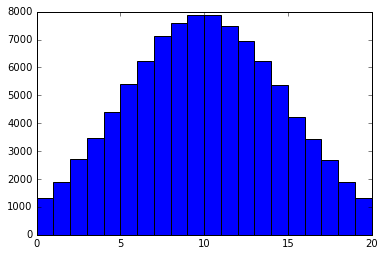

In [158]:

plt.bar(range(len(cnts)), cnts, 1)


In [197]:
# let's try to figure out why 'int' doesn't work by plotting 

# to plot a function, we need to generate a list of x values...
# but, range doesn't work with floats!

range(0,1,.1)

TypeError: 'float' object cannot be interpreted as an integer

In [198]:
# make a float version of range

def frange(start, end, n):
    inc = (end - start)/float(n)
    return [start+j*inc for j in range(n)]

frange(0,1,10)

[0.0,
 0.1,
 0.2,
 0.30000000000000004,
 0.4,
 0.5,
 0.6000000000000001,
 0.7000000000000001,
 0.8,
 0.9]

In [149]:
def plotf(func):
    # make a set of x vals
    x = frange(-3,3,50)
    # eval the func on the x vals
    y = [func(xv) for xv in x]
    plt.plot(x, y, 'r', linewidth=10)
    plt.grid(True)

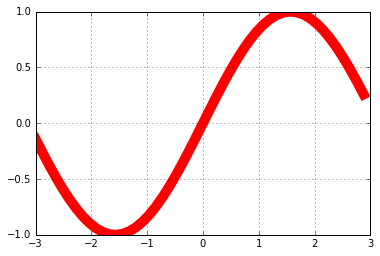

In [150]:
# test

plotf(math.sin)

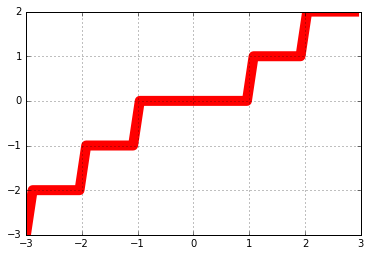

In [151]:
# now we see the problem - int is making the middle 
# bucket twice as wide as the other buckets

plotf(int)

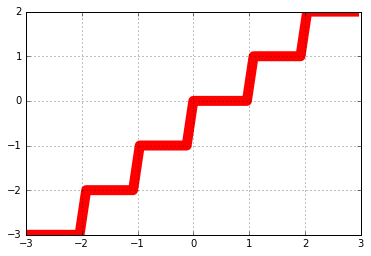

In [152]:
# math.floor does the right thing

plotf(math.floor)

# 7 segment display
- cheap displays
    - clock radios
    - elevators
- [wiki article](https://en.wikipedia.org/wiki/Seven-segment_display)


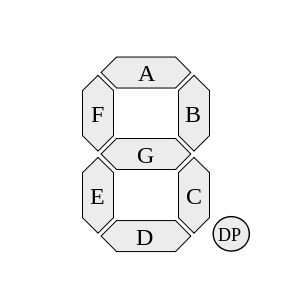

In [159]:
from IPython.display import Image

Image('https://upload.wikimedia.org/wikipedia/commons/thumb/0/02/7_segment_display_labeled.svg/300px-7_segment_display_labeled.svg.png')

In [160]:
# a '1' means turn on the corresponding segment
# each tuple is (a,b,c,d,e,f,g)

num = {' ':(0,0,0,0,0,0,0),
    '0':(1,1,1,1,1,1,0),
    '1':(0,1,1,0,0,0,0),
    '2':(1,1,0,1,1,0,1),
    '3':(1,1,1,1,0,0,1),
    '4':(0,1,1,0,0,1,1),
    '5':(1,0,1,1,0,1,1),
    '6':(1,0,1,1,1,1,1),
    '7':(1,1,1,0,0,0,0),
    '8':(1,1,1,1,1,1,1),
    '9':(1,1,1,1,0,1,1)}

In [161]:
# i don't like the above representation, too hard to read
# so, i will convert to something i find more user friendly
# now i can easily see which segments to turn on

import string
   
alpha = {}

for key in num.keys():
    val = num[key]
    segs = [a for a,n in zip(string.ascii_lowercase, val) if n]
    alpha[key] = segs
        
alpha

{' ': [],
 '0': ['a', 'b', 'c', 'd', 'e', 'f'],
 '1': ['b', 'c'],
 '2': ['a', 'b', 'd', 'e', 'g'],
 '3': ['a', 'b', 'c', 'd', 'g'],
 '4': ['b', 'c', 'f', 'g'],
 '5': ['a', 'c', 'd', 'f', 'g'],
 '6': ['a', 'c', 'd', 'e', 'f', 'g'],
 '7': ['a', 'b', 'c'],
 '8': ['a', 'b', 'c', 'd', 'e', 'f', 'g'],
 '9': ['a', 'b', 'c', 'd', 'f', 'g']}

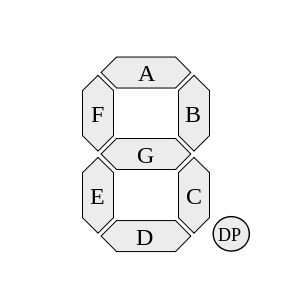

In [166]:
from IPython.display import Image

Image('https://upload.wikimedia.org/wikipedia/commons/thumb/0/02/7_segment_display_labeled.svg/300px-7_segment_display_labeled.svg.png')

In [172]:
# each segment is 1 long
# origin is at lower left

def seven(digit):
    digit = str(digit)
    for seg in alpha[digit]:
        if seg == 'a':
            # define line with two points
            pts = [[0,2], [1,2]]
        if seg == 'b':
            pts = [[1,1], [1,2]]
        if seg == 'c':
            pts = [[1,0], [1,1]]
        if seg == 'd':
            pts = [[0,0], [1,0]]
        if seg == 'e':
            pts = [[0,0],[0,1]]
        if seg == 'f':
            pts = [[0,1],[0,2]]
        if seg == 'g':
            pts = [[0,1],[1,1]]
        pt1,pt2 = pts
        x = [pt1[0]*.5, pt2[0]*.5]
        y = [pt1[1], pt2[1]]
        plt.plot(x, y, linewidth=40, color='r')
    # trick to fix aspect ratio
    plt.plot([1,1], [0,1])

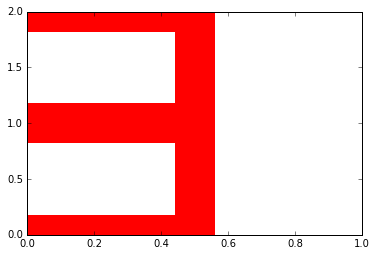

In [174]:
seven(3)

# Change of a dollar

In [175]:
# saving state in globals - ok for small/informal programs,
# but later we will see how to make a class
# note coins is a tuple, since the value of each 
# coin type never changes

coins = (25, 10, 5, 1)
coinInventory = [2, 3, 10, 7]

def change(price):
    owe = 100 - price
    ans = [0]*4
    for j in range(len(coins)):
        cval = coins[j]
        cinv = coinInventory[j]
        cnt = owe // cval 
        cnt = min(cnt, cinv)
        ans[j] = cnt
        coinInventory[j] -= cnt
        owe -= cnt * cval
        if owe == 0:
            break
    # return amount still owed, if any
    # coins returned
    # coins left in inventory
    return [owe,ans,coinInventory]
    
 

In [176]:
change(74)

[0, [1, 0, 0, 1], [1, 3, 10, 6]]

In [177]:
change(74)

[0, [1, 0, 0, 1], [0, 3, 10, 5]]

In [178]:
change(74)

[0, [0, 2, 1, 1], [0, 1, 9, 4]]

In [179]:
change(74)

[0, [0, 1, 3, 1], [0, 0, 6, 3]]

In [180]:
change(74)

[0, [0, 0, 5, 1], [0, 0, 1, 2]]

In [181]:
# ran out of coins

change(74)

[19, [0, 0, 1, 2], [0, 0, 0, 0]]